# Análisis Exploratorio de Datos


## Importacion de librerias

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Cargar datos

In [2]:
data = pd.read_csv("merged_songs.csv")
print(data.info())

print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80231 entries, 0 to 80230
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             80231 non-null  object 
 1   artist_name       80231 non-null  object 
 2   track_name        80231 non-null  object 
 3   track_id          80231 non-null  object 
 4   popularity        80231 non-null  int64  
 5   acousticness      80231 non-null  float64
 6   danceability      80231 non-null  float64
 7   duration_ms       80231 non-null  int64  
 8   energy            80231 non-null  float64
 9   instrumentalness  80231 non-null  float64
 10  key               80231 non-null  object 
 11  liveness          80231 non-null  float64
 12  loudness          80231 non-null  float64
 13  mode              80231 non-null  object 
 14  speechiness       80231 non-null  float64
 15  tempo             80231 non-null  float64
 16  time_signature    80231 non-null  object

- genre: Género musical de la canción.
- artist_name: Nombre del artista.
- track_name: Nombre de la canción.
- track_id: Identificador único de la canción.
- popularity: Popularidad de la canción (valor numérico).
- acousticness: Medida de cuán acústica es la canción.
- danceability: Facilidad para bailar la canción.
- duration_ms: Duración de la canción en milisegundos.
- energy: Nivel de energía de la canción.
- instrumentalness: Probabilidad de que la canción sea instrumental.
- key: Tono musical de la canción.
- liveness: Presencia de público en la grabación.
- loudness: Volumen general de la canción (en decibelios).
- mode: Modo musical (mayor o menor).
- speechiness: Presencia de palabras habladas en la canción.
- tempo: Tempo de la canción (en BPM).
- time_signature: Compás de la canción.
- valence: Medida de positividad o felicidad transmitida por la canción.


## Limpieza de datos


In [3]:
# Eliminar filas con valores nulos en el DataFrame
data = data.dropna()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 80188 entries, 0 to 80230
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             80188 non-null  object 
 1   artist_name       80188 non-null  object 
 2   track_name        80188 non-null  object 
 3   track_id          80188 non-null  object 
 4   popularity        80188 non-null  int64  
 5   acousticness      80188 non-null  float64
 6   danceability      80188 non-null  float64
 7   duration_ms       80188 non-null  int64  
 8   energy            80188 non-null  float64
 9   instrumentalness  80188 non-null  float64
 10  key               80188 non-null  object 
 11  liveness          80188 non-null  float64
 12  loudness          80188 non-null  float64
 13  mode              80188 non-null  object 
 14  speechiness       80188 non-null  float64
 15  tempo             80188 non-null  float64
 16  time_signature    80188 non-null  object 
 17

## Estadísticas


In [5]:
# Mostrar estadísticas descriptivas para las variables numéricas
display(data.describe())

# Mostrar estadísticas para variables categóricas
display(data.describe(include=['object']))

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,release_year
count,80188.000000,80188.000000,80188.00000,8.018800e+04,80188.000000,80188.000000,80188.000000,80188.000000,80188.000000,80188.000000,80188.000000,80188.000000
mean,52.712226,0.253511,0.58063,2.386568e+05,0.632970,0.087359,0.192719,-7.976823,0.089074,120.422591,0.491072,2003.783434
std,13.045106,0.293533,0.16081,8.670469e+04,0.228086,0.230145,0.159517,4.454062,0.099442,29.612630,0.241504,16.987574
min,0.000000,0.000001,0.05940,1.880000e+04,0.000707,0.000000,0.009670,-47.046000,0.022300,31.988000,0.000000,0.000000
25%,44.000000,0.018300,0.47800,1.954000e+05,0.481000,0.000000,0.095700,-9.759000,0.034900,96.281000,0.301000,1997.000000
50%,53.000000,0.119000,0.58900,2.264670e+05,0.663000,0.000020,0.127000,-6.880000,0.048100,119.815000,0.487000,2009.000000
75%,62.000000,0.417000,0.69500,2.658670e+05,0.817000,0.005510,0.244000,-5.032000,0.092900,140.010000,0.680000,2016.000000
max,100.000000,0.996000,0.98700,4.830606e+06,0.999000,0.999000,1.000000,3.744000,0.961000,242.903000,0.992000,2022.000000


,genre,artist_name,track_name,track_id,key,mode,time_signature
count,80188,80188,80188,80188,80188,80188,80188
unique,27,7668,45836,52584,12,2,5
top,Alternative,Drake,Home,6sVQNUvcVFTXvlk3ec0ngd,C,Major,4/4
freq,9181,396,52,8,9343,52774,73668


## Visualización


### Correlación

Gráfico de la correlación de Pearson de cada variable respecto a la popularidad


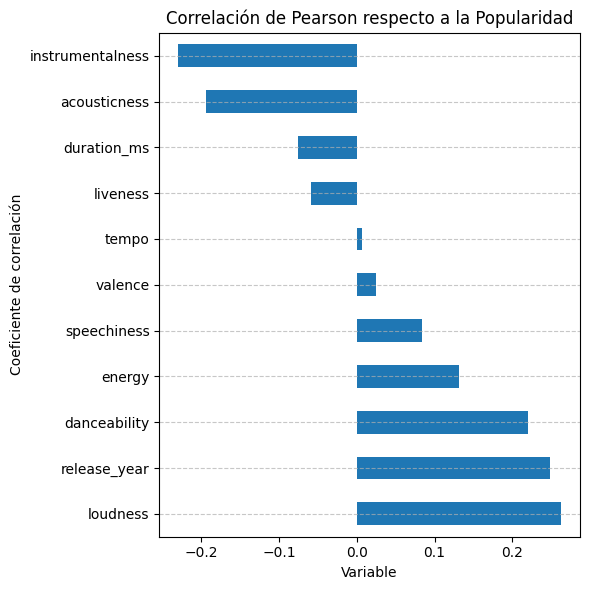

In [6]:
import matplotlib.pyplot as plt

# Calcular la correlación de Pearson de cada variable numérica respecto a 'popularity'
correlations = data.corr(numeric_only=True)['popularity'].sort_values(ascending=False)

# Excluir la autocorrelación
correlations = correlations.drop('popularity')

# Graficar las correlaciones
plt.figure(figsize=(6, 6))
correlations.plot(kind='barh')
plt.title('Correlación de Pearson respecto a la Popularidad')
plt.ylabel('Coeficiente de correlación')
plt.xlabel('Variable')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Matriz de correlación entre variables numéricas

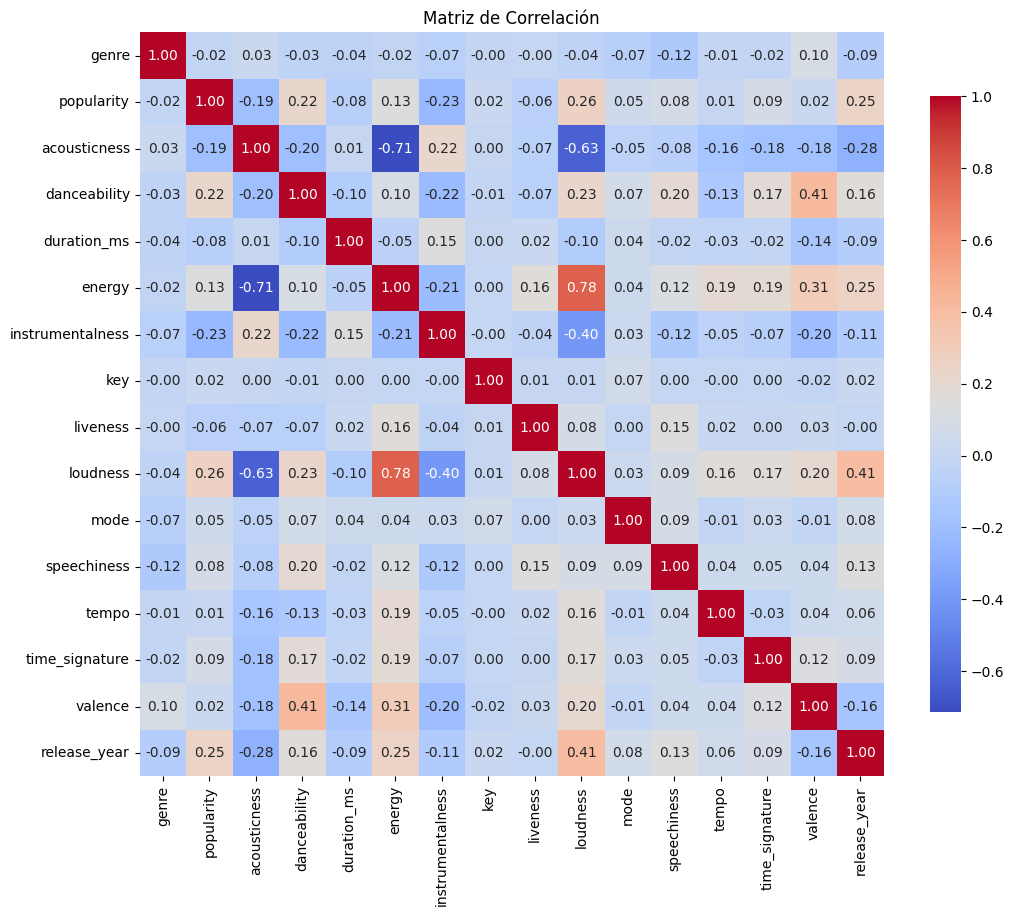

In [34]:
# Graficar matriz de correlación
import seaborn as sns
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.show()

### Cantidad de canciones por década


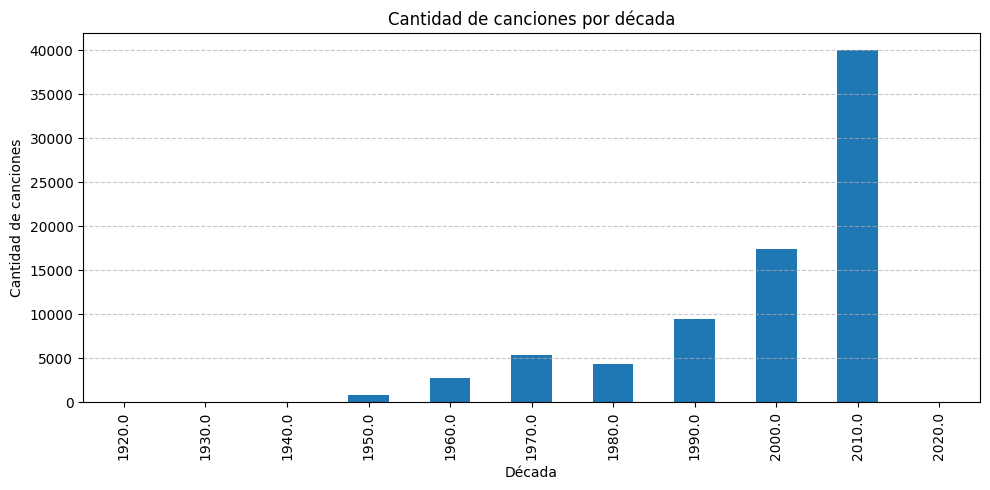

In [11]:
canciones_por_anio = data[data['release_year'] >= 1920]['release_year'].dropna().value_counts().sort_index()

# Agrupar la cantidad de canciones por década
decadas = (canciones_por_anio.index // 10) * 10
canciones_por_decada = canciones_por_anio.groupby(decadas).sum()

plt.figure(figsize=(10, 5))
canciones_por_decada.plot(kind='bar')
plt.title('Cantidad de canciones por década')
plt.xlabel('Década')
plt.ylabel('Cantidad de canciones')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
# Graficar el promedio de varias características de sonido por año
import plotly.express as px
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
df_avg = data[data['release_year'] >= 1920].dropna().groupby('release_year')[sound_features].mean().reset_index()
fig = px.line(
    df_avg,
    x='release_year',
    y=sound_features,
    markers=True,
    width=1000,
    height=600,
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig.update_layout(
    title='Promedio de características de sonido por año',
    xaxis_title='Año',
    yaxis_title='Valor promedio',
    legend_title='Característica',
    template='plotly_white'
)
fig.show()

In [13]:
# Mostrar los 10 géneros más populares y sus características promedio
# Mostrar los 10 géneros más populares y sus características promedio
import plotly.express as px

data_by_genres = pd.read_csv("merged_songs.csv")

if 'genre' in data_by_genres.columns:
    # Agrupar por género y calcular el promedio de las características relevantes
    genre_data = data_by_genres.groupby('genre')[['popularity', 'valence', 'energy', 'danceability', 'acousticness']].mean().reset_index()
    # Seleccionar los 10 géneros con mayor popularidad promedio
    top10_genres = genre_data.nlargest(10, 'popularity')
    # Graficar las características promedio de los 10 géneros más populares
    fig = px.bar(
        top10_genres,
        x='genre',
        y=['valence', 'energy', 'danceability', 'acousticness'],
        barmode='group',
        title='Top 10 géneros más populares y sus características promedio'
    )
    fig.update_layout(
        xaxis_title='Género',
        yaxis_title='Valor promedio',
        legend_title='Característica',
        template='plotly_white'
    )
    fig.show()
else:
    print("No existe una columna 'genres'")

# Creacion del modelo


## Preparar datos

In [4]:
# Codificar variables categóricas
from sklearn.preprocessing import LabelEncoder
categorical_columns = ["key", "mode", "time_signature", "genre"]
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))

data.head()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,release_year
0,18,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.0830,0.724,246333,0.689,0.000000,5,0.3040,-5.922,1,0.1350,146.496,3,0.6930,2005.0
1,18,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,62,0.0675,0.762,199520,0.520,0.000004,8,0.1140,-5.237,1,0.0959,75.047,3,0.0862,2018.0
2,18,Surfaces,Heaven Falls / Fall on Me,7yHqOZfsXYlicyoMt62yC6,61,0.3600,0.563,240597,0.366,0.002430,2,0.0955,-6.896,1,0.1210,85.352,3,0.7680,2018.0
3,18,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,66,0.9750,0.377,334570,0.255,0.000208,7,0.1020,-11.165,1,0.0387,125.004,4,0.3700,2016.0
4,18,Layton Greene,Roll In Peace,33YFwLJbAdgePluIuEVa9p,60,0.7200,0.523,170343,0.507,0.000000,10,0.0774,-6.448,1,0.2250,140.368,3,0.7000,2018.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Seleccionar características numéricas relevantes
features = [
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "liveness",
    "loudness",
    "speechiness",
    "valence",
    "tempo",
    "key",
    "mode",
    "time_signature",
    "genre"
]

# Separar datos en train y test para evaluación
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data[features])
X_test = scaler.transform(test_data[features])



In [11]:
# Ver primeros elementos
print(features)
print(X_train[:10])

['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo', 'key', 'mode', 'time_signature', 'genre']
[[-0.83190545 -0.58568508  1.34673742 -0.38081522 -0.72135513  0.84107179
  -0.28797295 -0.28979    -1.37309856  1.33441934  1.38665698  0.20414813
   1.01649346]
 [-0.81174161 -1.15766333  1.25901138 -0.38081522  2.98075039  0.12965692
   3.68160808 -0.10756909 -1.02359494 -0.39903731 -0.72115889  0.20414813
  -0.24172587]
 [-0.64456257 -1.95967632  0.33350161 -0.37978422 -0.48115414  0.14947475
   0.27911006 -0.75362506 -0.90416911 -1.26576563  1.38665698 -3.08467716
   0.87669131]
 [-0.11266028  0.62666013 -0.22355877 -0.38081522 -0.46233944  0.04768319
  -0.58104947 -1.1139255   0.12220462  1.0455099   1.38665698  0.20414813
  -0.38152801]
 [-0.43678291 -1.22605204 -0.52621363 -0.38028239  0.30279163  0.58434088
  -0.61617851 -0.4223143  -0.40092034  1.0455099   1.38665698  0.20414813
   1.4358999 ]
 [-0.79263544  0.5955

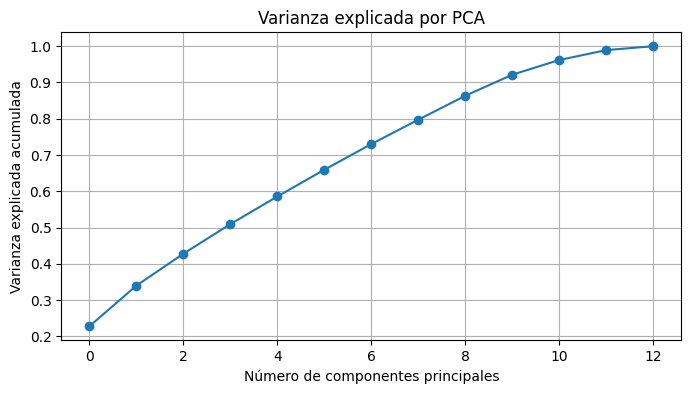

Número de componentes para explicar el 80% de la varianza: 9


In [17]:
# Reducir dimensionalidad con PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

X_scaled = scaler.fit_transform(data[features])
pca.fit(X_scaled)

# Graficar la varianza explicada por cada componente
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza explicada acumulada")
plt.title("Varianza explicada por PCA")
plt.grid(True)
plt.show()

# Elegir el número de componentes
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.8) + 1
print(f"Número de componentes para explicar el 80% de la varianza: {n_components}")

## Clustering con KMeans

### Elaboración del modelo

In [53]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

class KMeans_model:
    """Clase para implementar el modelo de recomendación mediante clustering KMeans."""

    def __init__(
        self,
        n_clusters=8,
        random_state=42,
        features=[
            "acousticness",
            "danceability",
            "energy",
            "instrumentalness",
            "liveness",
            "loudness",
            "speechiness",
            "valence",
            "tempo",
            "key",
            "mode",
            "time_signature",
            "genre",
        ],
    ):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.model = None
        self.features = features

    def fit(self, X):
        """Ajusta el modelo KMeans a los datos en X."""
        self.model = KMeans(n_clusters=self.n_clusters, random_state=self.random_state, n_init=10).fit(X)
        return self.model

    def predict(self, X):
        """Predice las etiquetas de cluster para los datos en X."""
        if self.model is not None:
            return self.model.predict(X)
        else:
            raise ValueError("El modelo no ha sido entrenado.")

    def _flatten_dict_list(self, dict_list: list):
        """Aplana una lista de diccionarios en un único diccionario"""
        flattened_dict = dict()
        for key in dict_list[0].keys():
            flattened_dict[key] = []
        for dictionary in dict_list:
            for key, value in dictionary.items():
                flattened_dict[key].append(value)
        return flattened_dict

    def _get_mean_vector(self, song_list):
        """Calcula el vector medio representativo de una lista de canciones."""
        song_vectors = []
        for song in song_list:
            song_vector = song[self.features].values
            song_vectors.append(song_vector)
        song_matrix = np.array(list(song_vectors))
        return np.mean(song_matrix, axis=0)

    def recommend_songs(self, song_list, spotify_data, n_songs=10):
        """
        Ofrece una lista de `n_songs` recomendaciones a partir de una lista de canciones escuchadas,
        recomendando solo canciones del mismo cluster.
        """
        metadata_cols = ['track_name', 'artist_name', 'track_id', 'release_year', 'distance']
        song_dict = self._flatten_dict_list(song_list)
        song_center = self._get_mean_vector(song_list)
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(spotify_data[self.features])
        song_center_df = pd.DataFrame([song_center], columns=self.features)
        scaled_song_center = scaler.transform(song_center_df)

        # Ajustar KMeans si no está ajustado
        if self.model is None:
            self.fit(scaled_data)

        # Obtener el cluster del centro de las canciones escuchadas
        cluster_labels = self.model.labels_
        center_cluster = self.predict(scaled_song_center)[0]

        # Filtrar canciones del mismo cluster y no escuchadas
        mask_cluster = cluster_labels == center_cluster
        mask_not_listened = ~spotify_data['track_id'].isin(song_dict['track_id'])
        mask = mask_cluster & mask_not_listened.values
        filtered_indices = np.where(mask)[0]

        if len(filtered_indices) == 0:
            return []

        filtered_scaled_data = scaled_data[filtered_indices]
        distances = cdist(scaled_song_center, filtered_scaled_data, 'cosine')[0]
        top_indices = np.argsort(distances)[:n_songs]
        selected_indices = filtered_indices[top_indices]

        rec_songs = spotify_data.iloc[selected_indices].copy()
        rec_songs['distance'] = distances[top_indices]
        return rec_songs[metadata_cols].to_dict(orient='records')

    def evaluate(self, test_data, train_data, n_songs=10):
        """
        Evalúa el modelo usando métricas de recomendación.
        """
        scaler = StandardScaler()
        X_train = scaler.fit_transform(train_data[self.features])
        if self.model is None:
            self.fit(X_train)
        precisiones = []
        recalls = []
        average_precisions = []
        ndcgs = []
        distancias = []
        for i, row in test_data.iterrows():
            recommendations = self.recommend_songs([row], train_data, n_songs=n_songs)
            if not recommendations:
                continue
            recommended_global_idx = [train_data[train_data['track_id'] == rec['track_id']].index[0] for rec in recommendations]
            recommended_idx = [train_data.index.get_loc(idx) for idx in recommended_global_idx]
            test_vector = scaler.transform(pd.DataFrame([row[self.features]], columns=self.features))
            dists = np.linalg.norm(X_train - test_vector, axis=1)
            sorted_idx = np.argsort(dists)
            relevancias = np.zeros(len(train_data))
            relevancias[sorted_idx[:n_songs]] = 1
            recommended_relevancias = relevancias[recommended_idx]
            num_relevantes = n_songs
            distancias.append(recommendations[0]['distance'])
            precision = np.sum(recommended_relevancias) / n_songs
            precisiones.append(precision)
            recall = np.sum(recommended_relevancias) / num_relevantes if num_relevantes > 0 else 0
            recalls.append(recall)
            if np.sum(recommended_relevancias) > 0:
                ap = 0
                hits = 0
                for idx, rel in enumerate(recommended_relevancias, 1):
                    if rel:
                        hits += 1
                        ap += hits / idx
                ap /= np.sum(recommended_relevancias)
            else:
                ap = 0
            average_precisions.append(ap)
            recommended_scores = 1 - dists[recommended_idx] / (dists[recommended_idx].max() if dists[recommended_idx].max() > 0 else 1)
            from sklearn.metrics import ndcg_score
            ndcg = ndcg_score([relevancias[recommended_idx]], [recommended_scores])
            ndcgs.append(ndcg)
        distancia_media = np.mean(distancias) if distancias else 0
        print(f"Distancia euclidiana promedio entre test y recomendación: {distancia_media:.4f}")
        print(f"Precisión@{n_songs}: {np.mean(precisiones):.4f}")
        print(f"Recall@{n_songs}: {np.mean(recalls):.4f}")
        print(f"MAP: {np.mean(average_precisions):.4f}")
        print(f"NDCG@{n_songs}: {np.mean(ndcgs):.4f}")

    def visualize_clusters(self, X):
        """Aplica PCA para visualizar clusters en 2D"""
        if not self.model:
            self.fit(X)
               
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)
        plt.figure(figsize=(10, 8))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=self.model.labels_, cmap='viridis', s=50, alpha=0.6)
        plt.title('Visualización de Clusters con PCA')
        plt.xlabel('Componente Principal 1')
        plt.ylabel('Componente Principal 2')
        plt.colorbar(label='Cluster')
        plt.grid(True)
        plt.show()

### Evaluación del modelo

In [54]:
# Evaluar el modelo
kmeans_model = KMeans_model(n_clusters=8)
kmeans_model.fit(X_train)
kmeans_model.evaluate(test_data, train_data, n_songs=10)

Distancia euclidiana promedio entre test y recomendación: 0.0412
Precisión@10: 0.5542
Recall@10: 0.5542
MAP: 0.7748
NDCG@10: 0.9921


In [21]:
import pprint

# Usar el modelo
recomendaciones_kmeans = kmeans_model.recommend_songs([test_data.iloc[0]], train_data)
pprint.pprint(recomendaciones_kmeans)

[{'artist_name': 'B.o.B',
  'distance': 0.06002030984231721,
  'release_year': 2012.0,
  'track_id': '0yQw3d0iQDjMrxaVHFv77J',
  'track_name': 'Strange Clouds (feat. Lil Wayne)'},
 {'artist_name': 'Jazmine Sullivan',
  'distance': 0.07272948510716548,
  'release_year': 2017.0,
  'track_id': '360NCp4XoQ0sFi5jgu5Ww7',
  'track_name': 'Insecure'},
 {'artist_name': 'Monte Booker',
  'distance': 0.0776942768975013,
  'release_year': 2017.0,
  'track_id': '5vS0exugk3uvkQCqKLWVyD',
  'track_name': 'Kompany'},
 {'artist_name': 'Malibu Ken',
  'distance': 0.08269695717235126,
  'release_year': 2019.0,
  'track_id': '2YSdttfME0OmOj9mPwHFIK',
  'track_name': 'Corn Maze'},
 {'artist_name': 'Kota the Friend',
  'distance': 0.09153755853013379,
  'release_year': 2018.0,
  'track_id': '0DSlj1DsBpyE5yOh4vpQXL',
  'track_name': 'Myrtle'},
 {'artist_name': 'Jazmine Sullivan',
  'distance': 0.09199671819553012,
  'release_year': 2017.0,
  'track_id': '360NCp4XoQ0sFi5jgu5Ww7',
  'track_name': 'Insecure'},

### Visualización de los clusters

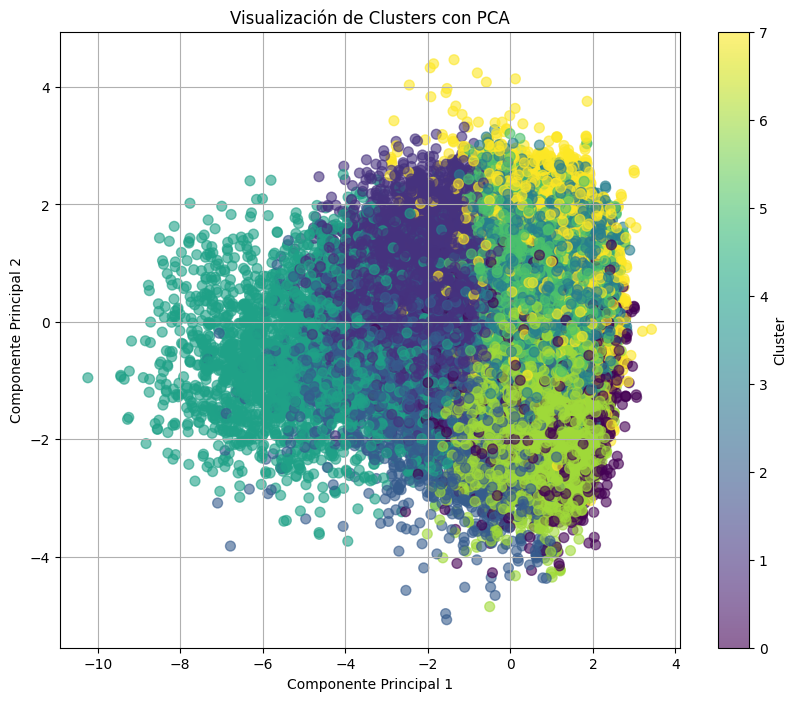

In [55]:
kmeans_model.visualize_clusters(X_train)

## Clustering con DBSCAN

### Elaboración del modelo

In [12]:
# Importar librerías
from sklearn.cluster import DBSCAN

class DBSCAN_model:
    """Clase para implementar el modelo de recomendación mediante clustering DBSCAN."""
    
    def __init__(self, eps=0.5, min_samples=5):
        """Inicializa el modelo con los parámetros de DBSCAN."""
        self.eps = eps
        self.min_samples = min_samples
        self.model = None

    def fit(self, X):
        """Ajusta el modelo DBSCAN a los datos en X."""
        self.model = DBSCAN(eps=self.eps, min_samples=self.min_samples, metric="euclidean").fit(X)
        return self.model

    def predict(self, X):
        """Predice las etiquetas de cluster para los datos en X."""
        if self.model is not None:
            return self.model.fit_predict(X)
        else:
            raise ValueError("El modelo no ha sido entrenado.")

    def _flatten_dict_list(self, dict_list: list[dict]):
        """Aplana una lista de diccionarios en un único diccionario"""
        flattened_dict = dict()
        for key in dict_list[0].keys():
            flattened_dict[key] = []
        
        for dictionary in dict_list:
            for key, value in dictionary.items():
                flattened_dict[key].append(value)
                
        return flattened_dict

    def _get_mean_vector(self, song_list):
        """Calcula el vector medio representativo de una lista de canciones."""
        song_vectors = []

        for song in song_list:
            song_vector = song[features].values
            song_vectors.append(song_vector)

        song_matrix = np.array(list(song_vectors))
        return np.mean(song_matrix, axis=0)
        
    def recommend_songs(self, song_list, spotify_data, n_songs=10):
        """Ofrece una lista de `n_songs` recomendaciones a partir de una lista de canciones escuchadas."""
        metadata_cols = ['track_name', 'artist_name', 'track_id', 'release_year', 'distance']
        song_dict = self._flatten_dict_list(song_list)
        
        song_center = self._get_mean_vector(song_list)
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(spotify_data[features])
        song_center_df = pd.DataFrame([song_center], columns=features)
        scaled_song_center = scaler.transform(song_center_df)
        # scaled_song_center = scaler.transform(song_center.reshape(1, -1))
        distances = cdist(scaled_song_center, scaled_data, 'cosine')[0]
        
        # Exclude already listened songs
        mask = ~spotify_data['track_id'].isin(song_dict['track_id'])
        filtered_indices = np.where(mask)[0]
        filtered_distances = distances[filtered_indices]

        # Get indices of the n_songs closest songs
        top_indices = filtered_indices[np.argsort(filtered_distances)[:n_songs]]

        rec_songs = spotify_data.iloc[top_indices].copy()
        rec_songs['distance'] = distances[top_indices]
        return rec_songs[metadata_cols].to_dict(orient='records')
    
    def visualize_clusters(self, X):
        """Aplica PCA para visualizar clusters en 2D"""
        if not self.model:
            self.fit(X)

        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)
        # Para DBSCAN, los labels pueden ser -1 (ruido)
        labels = self.model.labels_
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=50, alpha=0.6)
        plt.title('Visualización de Clusters DBSCAN con PCA')
        plt.xlabel('Componente Principal 1')
        plt.ylabel('Componente Principal 2')
        plt.colorbar(scatter, label='Cluster')
        plt.grid(True)
        plt.show()

In [19]:
# Entrenar el modelo DBSCAN
dbscan_model = DBSCAN_model(eps=2, min_samples=5)
dbscan_model.fit(X_train)

,eps,2
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


### Evaluación del modelo

In [24]:
# Evaluar el modelo usando solo la distancia euclidiana promedio entre cada canción de test y su recomendada
distancias = []

for i, row in test_data.iterrows():
    # Obtener el vector de la canción de test como DataFrame para mantener los nombres de columnas
    recommendations = dbscan_model.recommend_songs([row], data, n_songs=1)
    distancias.append(recommendations[0]['distance'])

distancia_media = np.mean(distancias) if distancias else 0
print(
    f"Distancia euclidiana promedio entre test y recomendación: {distancia_media:.4f}"
)

Distancia euclidiana promedio entre test y recomendación: 0.0375


In [26]:
from sklearn.metrics import ndcg_score

k = 10
precisiones = []
recalls = []
average_precisions = []
ndcgs = []

for i, row in test_data.iterrows():
    # Obtener recomendaciones del modelo DBSCAN
    recommendations = dbscan_model.recommend_songs([row], train_data, n_songs=k)
    # Obtener los índices globales de las canciones recomendadas en el set de entrenamiento
    recommended_global_idx = [train_data[train_data['track_id'] == rec['track_id']].index[0] for rec in recommendations]
    # Convertir los índices globales a índices posicionales (0-based)
    recommended_idx = [train_data.index.get_loc(idx) for idx in recommended_global_idx]
    # Calcular distancias entre la canción de test y todas las canciones de entrenamiento
    test_vector = scaler.transform(pd.DataFrame([row[features]], columns=features))
    dists = np.linalg.norm(X_train - test_vector, axis=1)
    sorted_idx = np.argsort(dists)
    # Definir las k canciones más cercanas como relevantes
    relevancias = np.zeros(len(train_data))
    relevancias[sorted_idx[:k]] = 1
    # Relevancia de las recomendaciones
    recommended_relevancias = relevancias[recommended_idx]
    num_relevantes = k  # Por definición, hay k relevantes
    # Precisión@k
    precision = np.sum(recommended_relevancias) / k
    precisiones.append(precision)
    # Recall@k
    recall = np.sum(recommended_relevancias) / num_relevantes if num_relevantes > 0 else 0
    recalls.append(recall)
    # MAP
    if np.sum(recommended_relevancias) > 0:
        ap = 0
        hits = 0
        for idx, rel in enumerate(recommended_relevancias, 1):
            if rel:
                hits += 1
                ap += hits / idx
        ap /= np.sum(recommended_relevancias)
    else:
        ap = 0
    average_precisions.append(ap)
    # NDCG
    # Para NDCG, usamos la relevancia y una "score" inversa a la distancia (similitud)
    recommended_scores = 1 - dists[recommended_idx] / (dists[recommended_idx].max() if dists[recommended_idx].max() > 0 else 1)
    ndcg = ndcg_score([relevancias[recommended_idx]], [recommended_scores])
    ndcgs.append(ndcg)

print(f"Precisión@{k}: {np.mean(precisiones):.4f}")
print(f"Recall@{k}: {np.mean(recalls):.4f}")
print(f"MAP: {np.mean(average_precisions):.4f}")
print(f"NDCG@{k}: {np.mean(ndcgs):.4f}")


Precisión@10: 0.5933
Recall@10: 0.5933
MAP: 0.7757
NDCG@10: 0.9971


### Visualización de los clusters

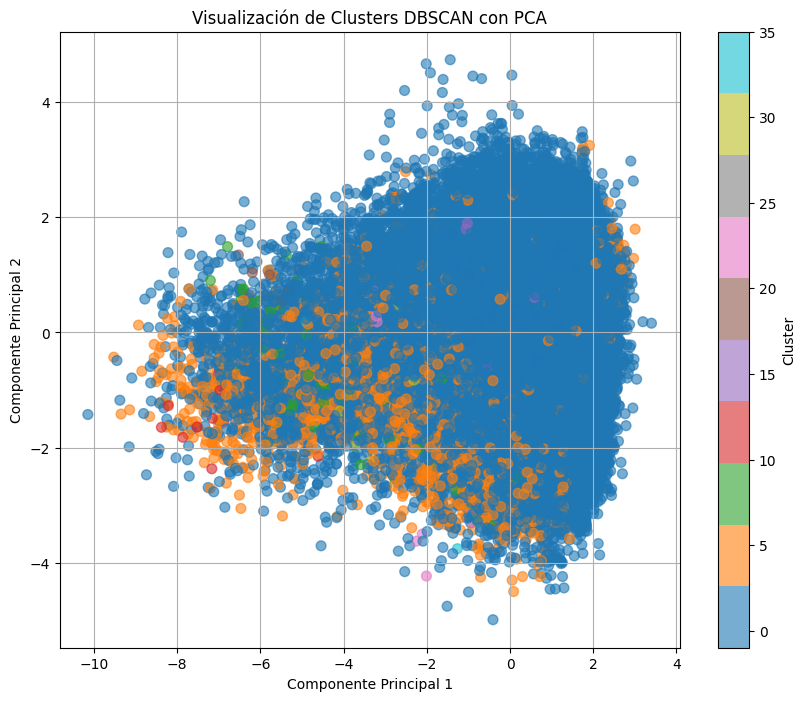

In [20]:
dbscan_model.visualize_clusters(X_train)

## Similitud por K neighbors

### Elaboración del modelo

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

# Crear y ajustar el modelo KNN
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(X_train)

,n_neighbors,5
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'euclidean'
,p,2
,metric_params,None
,n_jobs,None


In [28]:
# Evaluar el modelo usando solo la distancia euclidiana promedio entre cada canción de test y su recomendada
distancias = []

for i, row in test_data.iterrows():
    # Obtener el vector de la canción de test como DataFrame para mantener los nombres de columnas
    test_vector = scaler.transform(pd.DataFrame([row[features]], columns=features))
    distances_knn, indices = knn.kneighbors(test_vector)
    similar_idx = indices[0][0]  # El más cercano en train_data
    # Guardar la distancia euclidiana
    distancias.append(distances_knn[0][0])

distancia_media = np.mean(distancias) if distancias else 0
print(f"Distancia euclidiana promedio entre test y recomendación: {distancia_media:.4f}")

Distancia euclidiana promedio entre test y recomendación: 0.7943


In [29]:
k = 10
precisiones = []
recalls = []
average_precisions = []
ndcgs = []

for i, row in test_data.iterrows():
    test_vector = scaler.transform(pd.DataFrame([row[features]], columns=features))
    # Calcular distancias a todo el set de entrenamiento
    dists = np.linalg.norm(X_train - test_vector, axis=1)
    # Ordenar índices por distancia (de menor a mayor)
    sorted_idx = np.argsort(dists)
    # Definir las k canciones más cercanas como relevantes
    relevancias = np.zeros(len(train_data))
    relevancias[sorted_idx[:k]] = 1
    # Obtener las k recomendaciones del modelo
    distances_knn, indices = knn.kneighbors(test_vector, n_neighbors=k)
    recommended_idx = indices[0]
    # Relevancia de las recomendaciones
    recommended_relevancias = relevancias[recommended_idx]
    num_relevantes = k  # Por definición, hay k relevantes
    # Precisión@k
    precision = np.sum(recommended_relevancias) / k
    precisiones.append(precision)
    # Recall@k
    recall = np.sum(recommended_relevancias) / num_relevantes if num_relevantes > 0 else 0
    recalls.append(recall)
    # MAP
    if np.sum(recommended_relevancias) > 0:
        ap = 0
        hits = 0
        for idx, rel in enumerate(recommended_relevancias, 1):
            if rel:
                hits += 1
                ap += hits / idx
        ap /= np.sum(recommended_relevancias)
    else:
        ap = 0
    average_precisions.append(ap)
    # NDCG
    ndcg = ndcg_score([relevancias[recommended_idx]], [1 - distances_knn[0]])
    ndcgs.append(ndcg)

print(f"Precisión@{k}: {np.mean(precisiones):.4f}")
print(f"Recall@{k}: {np.mean(recalls):.4f}")
print(f"MAP: {np.mean(average_precisions):.4f}")
print(f"NDCG@{k}: {np.mean(ndcgs):.4f}")

Precisión@10: 0.9996
Recall@10: 0.9996
MAP: 1.0000
NDCG@10: 1.0000


In [30]:
class KNN_model:
    def __init__(self, features=None, n_neighbors=10):
        if features is None:
            self.features = [
                'acousticness', 'danceability', 'energy', 'instrumentalness',
                'liveness', 'loudness', 'speechiness', 'valence', 'tempo'
            ]
        else:
            self.features = features
        self.n_neighbors = n_neighbors
        self.scaler = StandardScaler()
        self.knn = None
        self.train_data = None
        self.test_data = None
        self.X_train = None
        self.X_test = None

    def train(self, data, test_size=0.2, random_state=42):
        self.train_data, self.test_data = train_test_split(
            data, test_size=test_size, random_state=random_state
        )
        self.X_train = self.scaler.fit_transform(self.train_data[self.features])
        self.X_test = self.scaler.transform(self.test_data[self.features])
        self.knn = NearestNeighbors(n_neighbors=self.n_neighbors, metric='euclidean')
        self.knn.fit(self.X_train)

    def evaluate(self, k=10):
        precisiones = []
        recalls = []
        average_precisions = []
        ndcgs = []
        distancias = []
        for i, row in self.test_data.iterrows():
            test_vector = self.scaler.transform(pd.DataFrame([row[self.features]], columns=self.features))
            dists = np.linalg.norm(self.X_train - test_vector, axis=1)
            sorted_idx = np.argsort(dists)
            relevancias = np.zeros(len(self.train_data))
            relevancias[sorted_idx[:k]] = 1
            distances_knn, indices = self.knn.kneighbors(test_vector, n_neighbors=k)
            recommended_idx = indices[0]
            recommended_relevancias = relevancias[recommended_idx]
            num_relevantes = k
            # Distancia euclidiana al vecino más cercano
            distancias.append(distances_knn[0][0])
            # Precisión@k
            precision = np.sum(recommended_relevancias) / k
            precisiones.append(precision)
            # Recall@k
            recall = np.sum(recommended_relevancias) / num_relevantes if num_relevantes > 0 else 0
            recalls.append(recall)
            # MAP
            if np.sum(recommended_relevancias) > 0:
                ap = 0
                hits = 0
                for idx, rel in enumerate(recommended_relevancias, 1):
                    if rel:
                        hits += 1
                        ap += hits / idx
                ap /= np.sum(recommended_relevancias)
            else:
                ap = 0
            average_precisions.append(ap)
            # NDCG
            ndcg = ndcg_score([relevancias[recommended_idx]], [1 - distances_knn[0]])
            ndcgs.append(ndcg)
        distancia_media = np.mean(distancias) if distancias else 0
        print(f"Distancia euclidiana promedio entre test y recomendación: {distancia_media:.4f}")
        print(f"Precisión@{k}: {np.mean(precisiones):.4f}")
        print(f"Recall@{k}: {np.mean(recalls):.4f}")
        print(f"MAP: {np.mean(average_precisions):.4f}")
        print(f"NDCG@{k}: {np.mean(ndcgs):.4f}")

    def recomend_songs(self, songs_df, n_recommendations=5):
        """
        songs_df: DataFrame con las canciones de entrada (debe tener las columnas de self.features)
        n_recommendations: número de canciones a recomendar (por defecto 5)
        Devuelve las canciones más cercanas del set de entrenamiento y su similitud (1 - distancia normalizada).
        """
        mean_vector = songs_df[self.features].mean().values.reshape(1, -1)
        mean_vector_scaled = self.scaler.transform(pd.DataFrame(mean_vector, columns=self.features))
        distances, indices = self.knn.kneighbors(mean_vector_scaled, n_neighbors=n_recommendations)
        recommended = self.train_data.iloc[indices[0]].copy()
        recommended['distance'] = distances[0]
        # Normalizar las distancias para calcular similitud (similitud = 1 - distancia/distancia_max)
        max_dist = distances[0].max() if distances[0].max() > 0 else 1
        recommended['similarity'] = 1 - (recommended['distance'] / max_dist)
        return recommended.sort_values('distance')



### Evaluación del modelo

In [31]:
# Ejemplo de uso:
model = KNN_model(features=features)
model.train(data)
model.evaluate()
recomendaciones = model.recomend_songs(data.sample(2))
print(recomendaciones)

Distancia euclidiana promedio entre test y recomendación: 0.7943
Precisión@10: 0.9996
Recall@10: 0.9996
MAP: 1.0000
NDCG@10: 1.0000
       genre                artist_name  \
59465     15                 Shenandoah   
48500     16  Los Auténticos Decadentes   
13307     20                 Jonny Lang   
16193     20                Louis Prima   
61619     17                  Lou Rawls   

                                              track_name  \
59465                            Next To You, Next To Me   
48500                                            Corazón   
13307                                          Lie To Me   
16193  (I'll Be Glad When You're Dead) You Rascal You...   
61619                                          Lady Love   

                     track_id  popularity  acousticness  danceability  \
59465  37KWffCdnLyHqvhugCQNM6          61         0.418         0.650   
48500  12NW2sUhBFz5VUxDZTp3Op          59         0.489         0.702   
13307  6DCALWbYX0BCOAGy0hMmRs

In [32]:
recomendaciones = model.recomend_songs(data.sample(10))
print(recomendaciones)

       genre    artist_name     track_name                track_id  \
34857      9  Local Natives      Wide Eyes  44DnIGEvTlhDkGv3xLSDcp   
45317      9     Drake Bell  I Found A Way  1rS3J4u1G8f6hbmTosa8Nf   
17214     10     The Weeknd     Adaptation  4pHQ9RYFhn3W0ha5KEuMnj   
38899     11     The Weeknd     Adaptation  4pHQ9RYFhn3W0ha5KEuMnj   
58656     15  Local Natives      Wide Eyes  44DnIGEvTlhDkGv3xLSDcp   

       popularity  acousticness  danceability  duration_ms  energy  \
34857          59       0.00131         0.528       266053   0.860   
45317          55       0.00560         0.531       179493   0.766   
17214          54       0.15900         0.639       283933   0.806   
38899          54       0.15900         0.639       283933   0.806   
58656          59       0.00131         0.528       266053   0.860   

       instrumentalness  ...  liveness  loudness  mode  speechiness    tempo  \
34857          0.250000  ...     0.251    -8.033     1       0.0397  123.120  

## Similitud con Annoy


### Elaboración del modelo

In [33]:
from annoy import AnnoyIndex

class Annoy_model:
    def __init__(self, features=None, n_trees=10):
        if features is None:
            self.features = [
                'acousticness', 'danceability', 'energy', 'instrumentalness',
                'liveness', 'loudness', 'speechiness', 'valence', 'tempo'
            ]
        else:
            self.features = features
        self.n_trees = n_trees
        self.scaler = StandardScaler()
        self.annoy_index = None
        self.train_data = None
        self.test_data = None
        self.X_train = None
        self.X_test = None

    def train(self, data, test_size=0.2, random_state=42):
        self.train_data, self.test_data = train_test_split(
            data, test_size=test_size, random_state=random_state
        )
        self.X_train = self.scaler.fit_transform(self.train_data[self.features])
        self.X_test = self.scaler.transform(self.test_data[self.features])
        f = len(self.features)
        self.annoy_index = AnnoyIndex(f, 'euclidean')
        for i, vec in enumerate(self.X_train):
            self.annoy_index.add_item(i, vec)
        self.annoy_index.build(self.n_trees)

    def evaluate(self, k=10):
        precisiones = []
        recalls = []
        average_precisions = []
        ndcgs = []
        distancias = []
        for i, row in self.test_data.iterrows():
            test_vector = self.scaler.transform(pd.DataFrame([row[self.features]], columns=self.features))[0]
            # Buscar los k vecinos más cercanos
            indices, distances_knn = self.annoy_index.get_nns_by_vector(test_vector, k, include_distances=True)
            # Calcular distancias a todo el set de entrenamiento
            dists = np.linalg.norm(self.X_train - test_vector, axis=1)
            sorted_idx = np.argsort(dists)
            relevancias = np.zeros(len(self.train_data))
            relevancias[sorted_idx[:k]] = 1
            recommended_idx = np.array(indices)
            recommended_relevancias = relevancias[recommended_idx]
            num_relevantes = k
            distancias.append(distances_knn[0])
            precision = np.sum(recommended_relevancias) / k
            precisiones.append(precision)
            recall = np.sum(recommended_relevancias) / num_relevantes if num_relevantes > 0 else 0
            recalls.append(recall)
            if np.sum(recommended_relevancias) > 0:
                ap = 0
                hits = 0
                for idx, rel in enumerate(recommended_relevancias, 1):
                    if rel:
                        hits += 1
                        ap += hits / idx
                ap /= np.sum(recommended_relevancias)
            else:
                ap = 0
            average_precisions.append(ap)
            # NDCG
            ndcg = ndcg_score([relevancias[recommended_idx]], [1 - np.array(distances_knn)])
            ndcgs.append(ndcg)
        distancia_media = np.mean(distancias) if distancias else 0
        print(f"Distancia euclidiana promedio entre test y recomendación: {distancia_media:.4f}")
        print(f"Precisión@{k}: {np.mean(precisiones):.4f}")
        print(f"Recall@{k}: {np.mean(recalls):.4f}")
        print(f"MAP: {np.mean(average_precisions):.4f}")
        print(f"NDCG@{k}: {np.mean(ndcgs):.4f}")

    def recomend_songs(self, songs_df, n_recommendations=5):
        """
        songs_df: DataFrame con las canciones de entrada (debe tener las columnas de self.features)
        n_recommendations: número de canciones a recomendar (por defecto 5)
        Devuelve las canciones más cercanas del set de entrenamiento y su similitud (1 - distancia normalizada).
        """
        mean_vector = songs_df[self.features].mean().values.reshape(1, -1)
        mean_vector_scaled = self.scaler.transform(pd.DataFrame(mean_vector, columns=self.features))[0]
        indices, distances = self.annoy_index.get_nns_by_vector(mean_vector_scaled, n_recommendations, include_distances=True)
        recommended = self.train_data.iloc[indices].copy()
        recommended['distance'] = distances
        max_dist = np.max(distances) if np.max(distances) > 0 else 1
        recommended['similarity'] = 1 - (recommended['distance'] / max_dist)
        return recommended.sort_values('distance')

ModuleNotFoundError: No module named 'annoy'

### Evaluación del modelo

In [ ]:
# Ejemplo de uso:
model = Annoy_model()
model.train(data)
model.evaluate()
recomendaciones = model.recomend_songs(data.sample(2))
print(recomendaciones)

In [ ]:
recomendaciones = model.recomend_songs(data.sample(10))
print(recomendaciones)